In [1]:
%config InlineBackend.figure_format = 'retina'

Run this notebook from the root directory i.e. from `wcst-nengo` so you don't have to change any paths

# Analyses of responses

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [3]:
from statannot import add_stat_annotation
from matplotlib.ticker import MaxNLocator

Load scripts that produce WCTS performance stats:

In [4]:
%run util_analyses.ipynb

Manually add names of directories with results and parameters that were varied for those:

In [5]:
data_desc = [
    ['full_sim',    {'p_feedback': 0.6, 'p_dim': 512, 'type': 'dim'}],  # this is the "best" simulation with d=512
    ['dim_128',     {'p_feedback': 0.6, 'p_dim': 128, 'type': 'dim'}],
    ['dim_256',     {'p_feedback': 0.6, 'p_dim': 256, 'type': 'dim'}],
    ['dim_1024',    {'p_feedback': 0.6, 'p_dim': 1024, 'type': 'dim'}],
    ['feedback_01', {'p_feedback': 0.1, 'p_dim': 512, 'type': 'mem'}],
    ['feedback_2',  {'p_feedback': 0.2, 'p_dim': 512, 'type': 'mem'}],
    ['feedback_04', {'p_feedback': 0.4, 'p_dim': 512, 'type': 'mem'}],
    ['feedback_08', {'p_feedback': 0.8, 'p_dim': 512, 'type': 'mem'}],
    ['full_sim',    {'p_feedback': 0.6, 'p_dim': 512, 'type': 'mem'}],
    ['fb_bgout_03', {'p_feedback': 0.3, 'p_dim': 512, 'type': 'IA'}],
    ['fb_bgout_05', {'p_feedback': 0.5, 'p_dim': 512, 'type': 'IA'}],
    ['fb_bgout_07', {'p_feedback': 0.7, 'p_dim': 512, 'type': 'IA'}],
    ['full_sim',    {'p_feedback': 0.9, 'p_dim': 512, 'type': 'IA'}],
]

dfs = []

for dir_name, cols in data_desc:
    path = os.path.join(os.path.expanduser('./results/'), dir_name) 
    assert os.path.exists(path), "Can't find {}".format(path)
    print(path, cols)    
    dfs.append(load_data(path, cols))    
              
df = pd.concat(dfs)

./results/full_sim {'p_feedback': 0.6, 'p_dim': 512, 'type': 'dim'}
./results/dim_128 {'p_feedback': 0.6, 'p_dim': 128, 'type': 'dim'}
./results/dim_256 {'p_feedback': 0.6, 'p_dim': 256, 'type': 'dim'}
./results/dim_1024 {'p_feedback': 0.6, 'p_dim': 1024, 'type': 'dim'}
./results/feedback_01 {'p_feedback': 0.1, 'p_dim': 512, 'type': 'mem'}
./results/feedback_2 {'p_feedback': 0.2, 'p_dim': 512, 'type': 'mem'}
./results/feedback_04 {'p_feedback': 0.4, 'p_dim': 512, 'type': 'mem'}
./results/feedback_08 {'p_feedback': 0.8, 'p_dim': 512, 'type': 'mem'}
./results/full_sim {'p_feedback': 0.6, 'p_dim': 512, 'type': 'mem'}
./results/fb_bgout_03 {'p_feedback': 0.3, 'p_dim': 512, 'type': 'IA'}
./results/fb_bgout_05 {'p_feedback': 0.5, 'p_dim': 512, 'type': 'IA'}
./results/fb_bgout_07 {'p_feedback': 0.7, 'p_dim': 512, 'type': 'IA'}
./results/full_sim {'p_feedback': 0.9, 'p_dim': 512, 'type': 'IA'}


In [6]:
savefigs = False

# E1: Number of categories + E2: Perseverative Errors

In [7]:
from matplotlib import rc
rc("font", family="serif")

In [8]:
sns.set_context("paper")

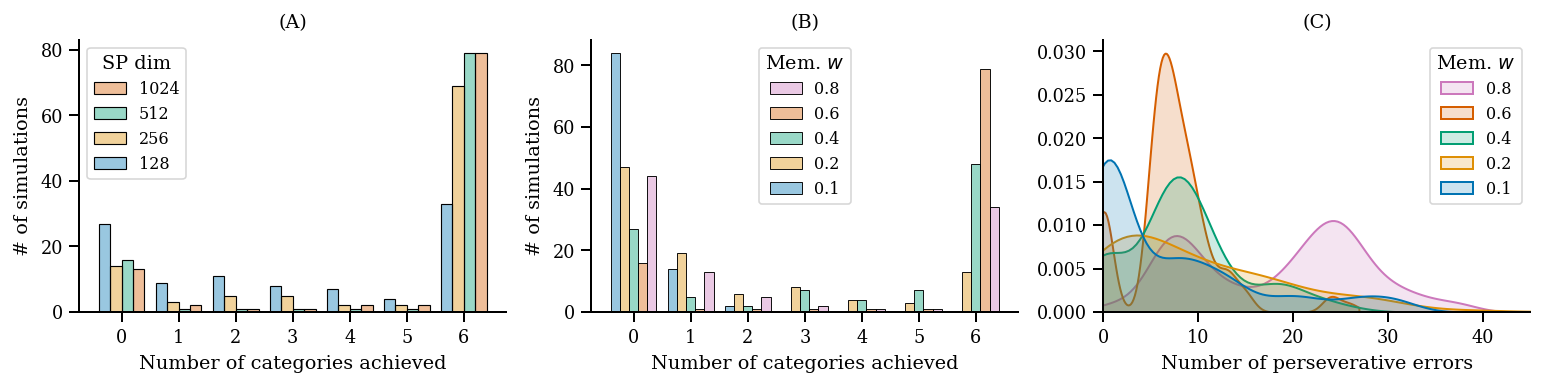

In [9]:
axes = plt.subplots(1, 3, figsize=(13, 2.5))  #.5 seems to show all n_cat on x-axis
# for each seed find the maximum # of categories achieved

palette = "colorblind"

# Subplot 1
ddf = df.query('type=="dim"').groupby(['seed', 'p_dim'], as_index=False)['n_categories'].max()
sns.histplot(data=ddf, x="n_categories", discrete=True, alpha=.4, 
                  hue='p_dim', multiple="dodge", shrink=.8, palette=palette,
            ax=axes[1][0], legend=False)
# axes[1][0].set_title('SP dimension') 
axes[1][0].set_xlabel('Number of categories achieved')
axes[1][0].set_ylabel('# of simulations')
axes[1][0].legend(['128', '256', '512', '1024'][::-1], loc='upper left', prop={'size': 8}, title='SP dim')
axes[1][0].set_title('(A)')

hue_order=[0.10, 0.20, 0.40, 0.60, 0.80]

# Subplot 2
tdf = df.query('type=="mem"').groupby(['seed', 'p_feedback'], as_index=False)['n_categories'].max()
sns.histplot(data=tdf, x="n_categories", 
             discrete=True, ax=axes[1][1], alpha=.4, hue='p_feedback', multiple="dodge", shrink=.8,
             palette=palette, legend=False, hue_order=hue_order)
axes[1][1].legend(['0.8', '0.6', '0.4', '0.2', '0.1'], loc='upper center', prop={'size': 8}, title='Mem. $w$')
# axes[1][1].set_title('Memory Connection Strength')
axes[1][1].set_xlabel('Number of categories achieved')
axes[1][1].set_ylabel('# of simulations')
axes[1][1].set_title('(B)')

# Subplot 3
# Custom bandwidth determined manually so as to avoid over-smoothing multimodal dists
tdf = df.query('type=="mem"').groupby(['seed', 'p_feedback', 'type']).sum()
sns.kdeplot(data=tdf.groupby(['seed', 'p_feedback']).sum(), x="p_error", hue="p_feedback", 
            fill=True, cut=1, palette=palette, alpha=.2, linewidth=1, #multiple="fill",
           ax=axes[1][2], legend=False, bw_method=.2, common_norm=True, hue_order=hue_order) 
# axes[1][2].set_title('Memory Connection Strength')
axes[1][2].set_xlabel('Number of perseverative errors')
axes[1][2].set_ylabel('')
axes[1][2].set_xlim(0, 45)
axes[1][2].legend(['0.8', '0.6', '0.4', '0.2', '0.1'], loc='upper right', prop={'size': 8}, title='Mem. $w$')
axes[1][2].set_title('(C)')

sns.despine()

if savefigs:
    plt.savefig('figs/exp1-3.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [10]:
for p_dim in [128, 256, 512, 1024]:
    for cat in [0, 6]:
        r = ddf.query('p_dim=={} and n_categories=={}'.format(p_dim, cat))
        print('d={}, c={}, #={}'.format(p_dim, cat, len(r)))
    print()

d=128, c=0, #=27
d=128, c=6, #=33

d=256, c=0, #=14
d=256, c=6, #=69

d=512, c=0, #=16
d=512, c=6, #=79

d=1024, c=0, #=13
d=1024, c=6, #=79



In [11]:
tdf = df.query('type=="mem"').groupby(['seed', 'p_feedback'], as_index=False)['n_categories'].max()

for p_dim in ['0.80', '0.60', '0.40', '0.20', '0.10']:    
    for cat in [0,1, 2, 3, 4, 5, 6]:
        r = tdf.query('p_feedback=={} and n_categories=={}'.format(p_dim, cat))
        print('d={}, c={}, #={}'.format(p_dim, cat, len(r)))
    print()

d=0.80, c=0, #=44
d=0.80, c=1, #=13
d=0.80, c=2, #=5
d=0.80, c=3, #=2
d=0.80, c=4, #=1
d=0.80, c=5, #=1
d=0.80, c=6, #=34

d=0.60, c=0, #=16
d=0.60, c=1, #=1
d=0.60, c=2, #=1
d=0.60, c=3, #=1
d=0.60, c=4, #=1
d=0.60, c=5, #=1
d=0.60, c=6, #=79

d=0.40, c=0, #=27
d=0.40, c=1, #=5
d=0.40, c=2, #=2
d=0.40, c=3, #=7
d=0.40, c=4, #=4
d=0.40, c=5, #=7
d=0.40, c=6, #=48

d=0.20, c=0, #=47
d=0.20, c=1, #=19
d=0.20, c=2, #=6
d=0.20, c=3, #=8
d=0.20, c=4, #=4
d=0.20, c=5, #=3
d=0.20, c=6, #=13

d=0.10, c=0, #=84
d=0.10, c=1, #=14
d=0.10, c=2, #=2
d=0.10, c=3, #=0
d=0.10, c=4, #=0
d=0.10, c=5, #=0
d=0.10, c=6, #=0



## Comparison with human data

In [12]:
from scipy.stats import sem
from matplotlib import cm

In [13]:
%run util_analyses.ipynb

Consider only "rule memory" data and feedback strengths that showed reasonable performance:

In [14]:
data = df.query('type=="mem" and p_feedback in [0.4, 0.6, 0.8]')

All simulations in that category are with 512d SPs:

In [15]:
print(data.p_dim.unique())
print(data.p_feedback.unique())

[512]
[0.4 0.8 0.6]


Discard all seeds where `n_categories=0` (the commented code does the same as the one liner but for some reason prints four outputs even though there should be only 3 for 3 model), expected # seeds to drop is: 27, 16, 44

In [16]:
res = data.groupby(['p_dim', 'p_feedback']).apply(
    lambda x: get_stats(discard_seeds(x, index='n_categories', criterion='below', th=1)))

Will discard 27 seeds
Will discard 16 seeds
Will discard 44 seeds


In [17]:
x = res.copy()
x.columns = x.columns.get_level_values(0)
x.reset_index(inplace=True)
x.rename(columns = {"level_2":"index"}, inplace=True) 

Drop "conceptual category" for which we have no data, and learn to learn:

Load human data and set vars:

In [18]:
h = get_human_stats()
h.columns = h.columns.get_level_values(0)
h.reset_index(inplace=True)
h['p_dim'] = 'H'
h['p_feedback'] = 'H'

In [19]:
h = h.query("index!='Learning to learn' and index!='Conceptual category'")
x = x.query("index!='Learning to learn' and index!='Conceptual category'")

In [20]:
dff = pd.concat([x, h], axis=0, sort=False)

In [21]:
dff[:4]

,p_dim,p_feedback,index,N,Mean,SD,SE,cSE,CIl,CIh,CIdiff
0,512,0.40,Total trials,73.00,94.15,25.12,2.94,5.76,88.39,99.91,11.52
1,512,0.40,Trials correct,73.00,73.45,15.19,1.78,3.48,69.97,76.94,6.97
2,512,0.40,Errors,73.00,20.70,17.32,2.03,3.97,16.73,24.67,7.95
3,512,0.40,Perseverative responses,73.00,9.05,8.49,0.99,1.95,7.11,11.00,3.90


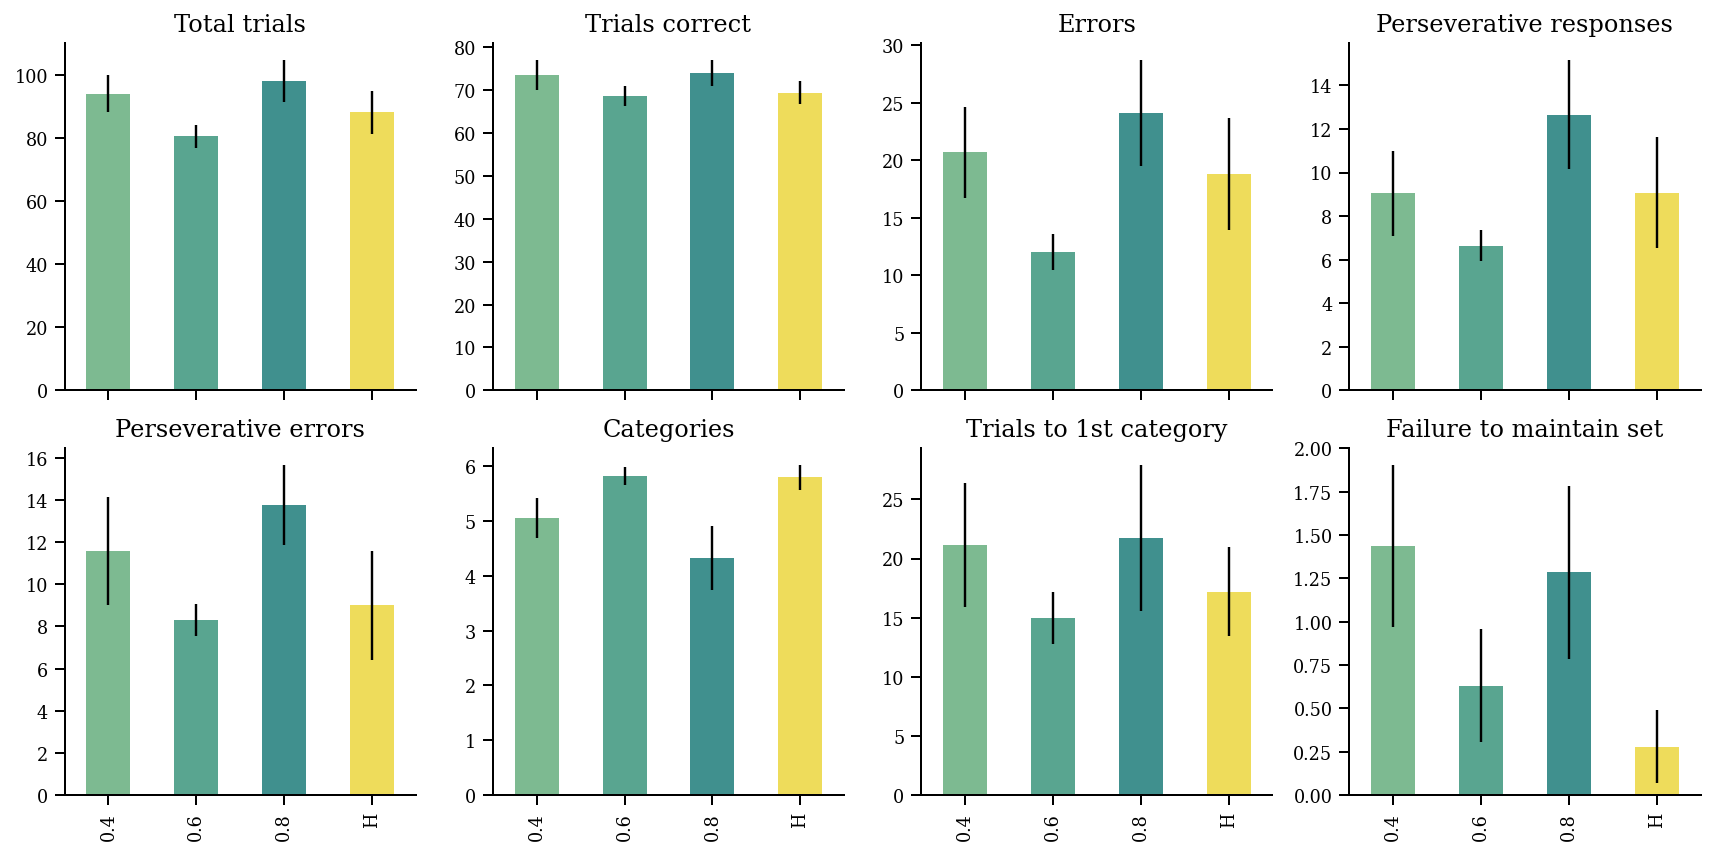

In [22]:
def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")    
    data.plot(x=x, y=y, yerr=yerr, kind="bar", ax=ax, **kwargs)    
x_var = "p_feedback"

colors_model = sns.color_palette("crest")[:len(dff[x_var].unique())-1]
color_human = [sns.colors.xkcd_rgb['dull yellow']]
colors = colors_model + color_human

g = sns.FacetGrid(dff, col="index", col_wrap=4, sharey=False)
g.map_dataframe(errplot, x=x_var, y="Mean", yerr="cSE", color=colors, ylim=[0, None])

for i, ax in enumerate(g.axes.flat):    
    title = ax.get_title().replace('index = ', '')
    ax.set_title(title, fontsize=12)

# if savefigs:
#     plt.savefig('figs/model-human-cmp.pdf', dpi=300, bbox_inches='tight')

### Significance testing

Using Bonferroni correction:

In [23]:
from scipy.stats import norm

In [24]:
n_tests = 8
alpha = 0.05
c = norm.ppf(1-(alpha/n_tests)/2)
c

2.7343687865331767

In [25]:
for w in ['0.4', '0.6', '0.8']:
    print('-----\nModel with w=', w)
    nr_same = 0
    for idx in dff['index'].unique():  
        model = dff.query('index=="{}" and p_feedback=={}'.format(idx, w))
        human = dff.query('index=="{}" and p_feedback=="{}"'.format(idx, 'H'))

        Mean_diff = (model.Mean.values - human.Mean.values)[0]
        SE_diff = np.sqrt(model.SE.values**2 + human.SE.values**2)[0]
        cil, cih =  Mean_diff-c*SE_diff,  Mean_diff+c*SE_diff

        sig = (cil < 0) and (cih > 0)
        nr_same += int(sig)

        print("idx = {}\n[{:.2f}, {:.2f}]\nincl 0: {}\n".format(idx, cil, cih, sig))

    print('No differences: {}/{}'.format(nr_same, 8))

-----
Model with w= 0.4
idx = Total trials
[-6.60, 18.42]
incl 0: True

idx = Trials correct
[-2.02, 10.12]
incl 0: True

idx = Errors
[-6.90, 10.62]
incl 0: True

idx = Perseverative responses
[-4.50, 4.45]
incl 0: True

idx = Perseverative errors
[-2.50, 7.67]
incl 0: True

idx = Categories
[-1.34, -0.15]
incl 0: False

idx = Trials to 1st category
[-5.09, 12.97]
incl 0: True

idx = Failure to maintain set
[0.44, 1.88]
incl 0: False

No differences: 6/8
-----
Model with w= 0.6
idx = Total trials
[-18.42, 3.23]
incl 0: True

idx = Trials correct
[-5.69, 4.15]
incl 0: True

idx = Errors
[-13.95, 0.29]
incl 0: True

idx = Perseverative responses
[-6.14, 1.26]
incl 0: True

idx = Perseverative errors
[-4.47, 3.04]
incl 0: True

idx = Categories
[-0.37, 0.42]
incl 0: True

idx = Trials to 1st category
[-8.30, 3.85]
incl 0: True

idx = Failure to maintain set
[-0.19, 0.89]
incl 0: True

No differences: 8/8
-----
Model with w= 0.8
idx = Total trials
[-3.54, 23.24]
incl 0: True

idx = Trials